# MachineLearnia Vidéo 5 - Premier Neurone 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [3]:
def model(X, W, b):
    Z = X.dot(W) + b
    #print(Z.min())
    A = 1 / (1 + np.exp(-Z))
    return A

In [4]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [5]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [6]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [7]:
def predict(X, W, b):
    A = model(X, W, b)
    #print(A)
    return A >= 0.5

In [8]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm 

In [78]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.1, n_iter=100) :
    
    W, b = initialisation(X_train)
    
    train_loss = [] 
    train_acc = []
    test_loss = []
    test_acc = []
    
    # Training
    for i in tqdm(range (n_iter)):
        # Activation
        A = model(X_train, W, b)
        
        if i % 10 == 0 :
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))
             # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
        
        #Mise à jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate = learning_rate)
                
    plt.figure(figsize=(12,4)) 
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()
    return (W,b)

# Exercice - Cat vs Dog

In [10]:
%pip install h5py # h5py vous permet d'ouvrir les fichiers au format hdf5. N'oubliez pas de l'installer !
from utilities import *

Note: you may need to restart the kernel to use updated packages.


In [11]:
X_train, y_train, X_test, y_test = load_data()

In [12]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [13]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


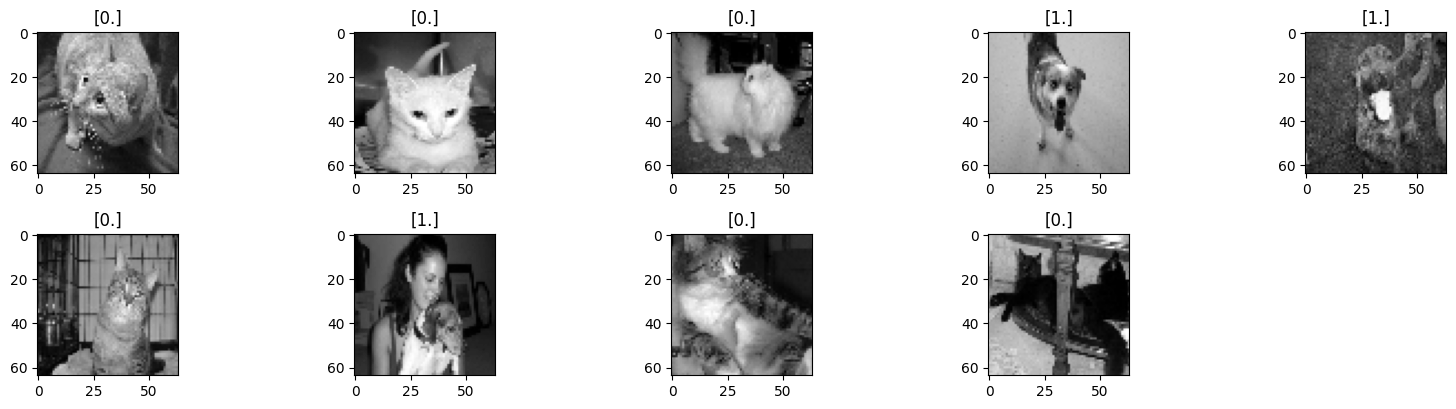

In [14]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [15]:
# TO DO 
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
# 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
# 5. Partager vos conclusions dans les commentaires !

In [74]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [05:25<00:00, 307.38it/s]


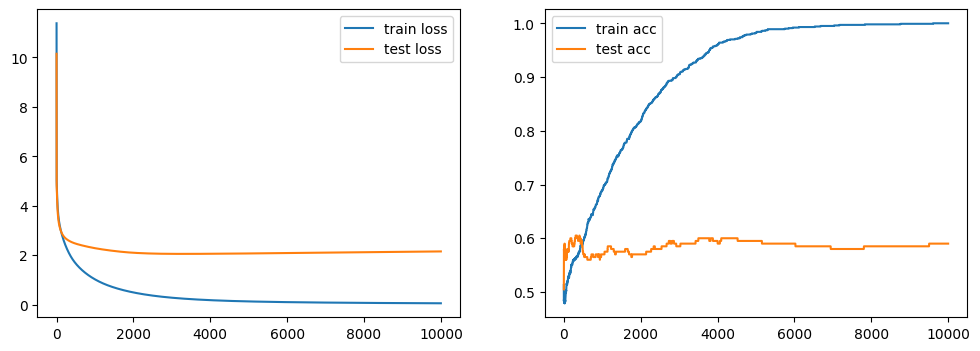

In [83]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01,n_iter=100000)

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:04<00:00,  7.16it/s]


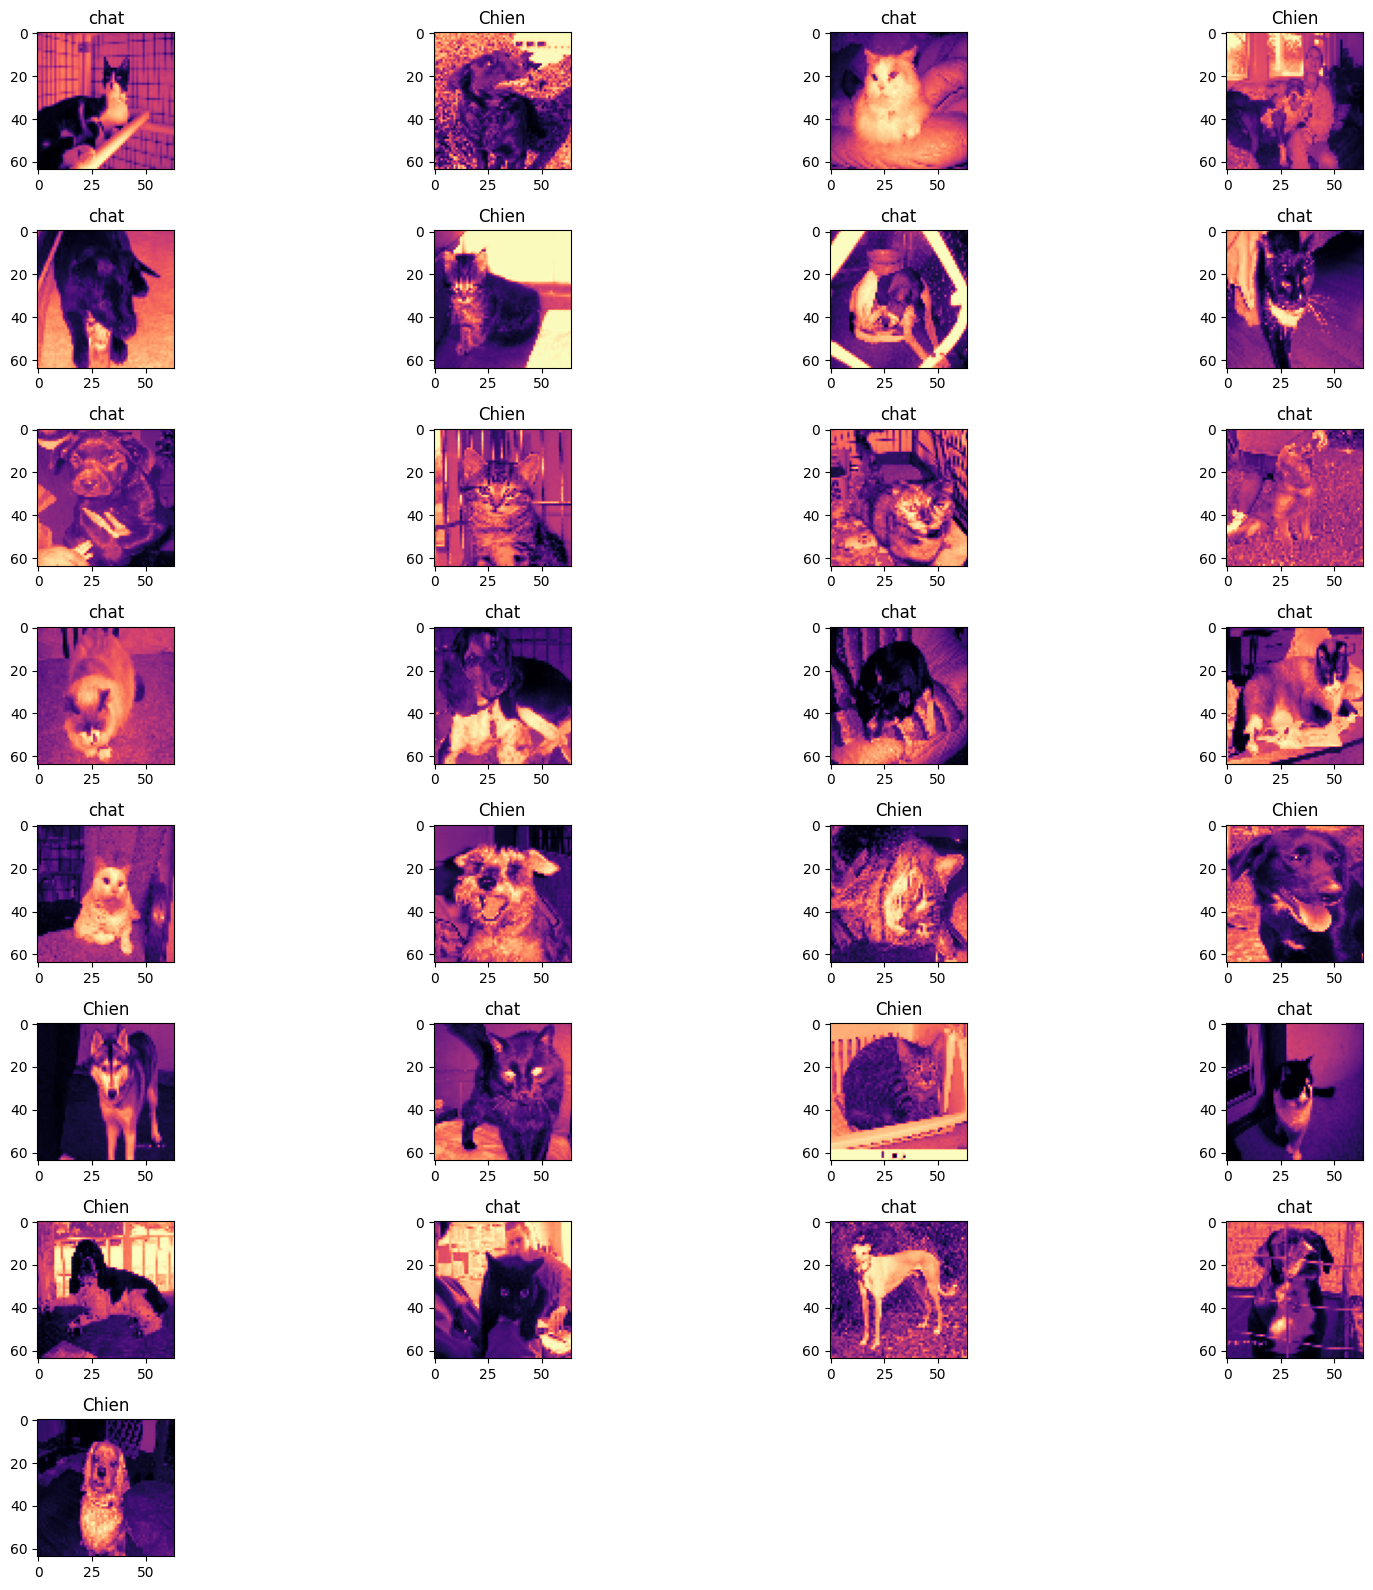

In [84]:
plt.figure(figsize=(16, 16))
for i in tqdm(range(1, 30)):
    plt.subplot(8, 4, i)
    plt.imshow(X_test[i], cmap='magma')
    if (predict(X_test_reshape[i], W, b)):
        plt.title("Chien")
    else :
        plt.title("chat")
    plt.tight_layout()
plt.show()

>≤@